<a href="https://colab.research.google.com/github/bimal-bp/Hybrid-Recommendation-System.py.ipynb/blob/ML_MODELS/Hybrid_Recommendation_System_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
rating=pd.read_csv('/content/drive/MyDrive/ratings.csv')
rating.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [76]:
movie=pd.read_csv('/content/drive/MyDrive/movies (1).csv')
movie.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [77]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [78]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<Axes: xlabel='rating', ylabel='Density'>

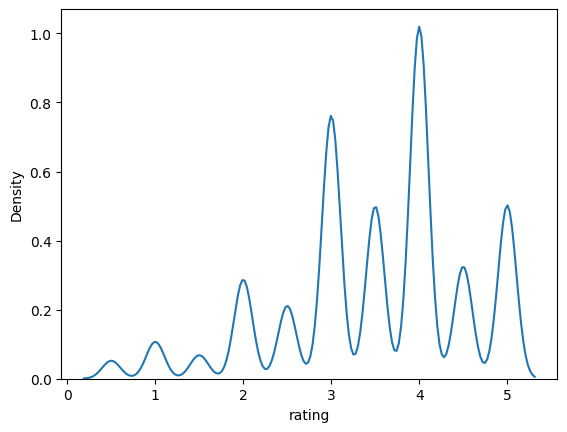

In [79]:
sns.kdeplot(rating['rating'])

In [80]:
# converting the Genre to a list

Genre=[]
Genres={}
for num in range(0,len(movie)):
  key=movie.iloc[num]['title']
  value=movie.iloc[num]['genres'].split('|')
  Genres[key]=value
  Genre.append(value)

In [81]:
movie['new']= Genre

In [82]:
import re

# Create a regular expression pattern to match the year in parentheses
pattern = r'\((\d{4})\)'

# Create an empty list to store the extracted years
years = []

# Loop through the movie titles and extract the year
for title in movie['title']:
    match = re.search(pattern, title)
    if match:
        year = match.group(1)
        years.append(year)
    else:
        years.append(None)

# Add the 'year' column to the DataFrame
movie['year'] = years


In [83]:
import re

# Create a regular expression pattern to match the year in parentheses
year_pattern = r'\((\d{4})\)'

# Create empty lists to store the extracted movie names and raw data
movie_names = []
raw_data = []

# Loop through the movie titles
for title in movie['title']:
    match = re.search(year_pattern, title)
    if match:
        # If a year is found, extract the matched year
        year = match.group(1)

        # Remove the year from the title using re.sub
        movie_name = re.sub(year_pattern, '', title).strip()
        movie_names.append(movie_name)
    else:
        # If no year is found, keep the original title
        movie_names.append(title)

# Add 'moviename' column to the DataFrame
movie['moviename'] = movie_names


In [84]:
movie

,movieId,title,genres,new,year,moviename
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995,Father of the Bride Part II
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[Action, Animation, Comedy, Fantasy]",2017,Black Butler: Book of the Atlantic
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[Animation, Comedy, Fantasy]",2017,No Game No Life: Zero
9739,193585,Flint (2017),Drama,[Drama],2017,Flint
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[Action, Animation]",2018,Bungo Stray Dogs: Dead Apple


In [85]:
# converting list to storng of new
movie['new']=movie['new'].apply(' '.join)

In [86]:
#  aplling feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
tfidf=TfidfVectorizer(stop_words='english')
# after appplying tfidf
matrix=tfidf.fit_transform(movie['new'])

In [88]:
from sklearn.metrics.pairwise import cosine_similarity


In [92]:
#Making a new series which have two columns in it
#Movie name and movie id

movies_dataset = movie.reset_index()
titles = movies_dataset['moviename']
indices = pd.Series(movies_dataset.index, index=movies_dataset['moviename'])

In [98]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load movie dataset
movies = pd.read_csv('/content/drive/MyDrive/movies (1).csv')

# Load ratings dataset
ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')

# Combine movie genres into a single string for content-based filtering
movies['genres'] = movies['genres'].str.replace('|', ' ')

# Create a TF-IDF vectorizer for movie genres
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['genres'])

# Compute the cosine similarity between movies based on genres
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get content-based recommendations
def content_based_filtering(movie_title, num_recommendations):
    # Get the index of the movie
    movie_index = movies[movies['title'] == movie_title].index[0]

    # Get the cosine similarity scores for the movie
    sim_scores = list(enumerate(cosine_sim[movie_index]))

    # Sort movies by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top content-based recommendations
    top_content_recommendations = [movies.iloc[movie[0]]['title'] for movie in sim_scores[1:num_recommendations + 1]]

    return top_content_recommendations

# Example usage
movie_title = 'Toy Story (1995)'
num_recommendations = 10
recommendations = content_based_filtering(movie_title, num_recommendations)
print(recommendations)


<ipython-input-98-d56327e1d721>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|', ' ')


['Antz (1998)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)", 'Monsters, Inc. (2001)', 'Wild, The (2006)', 'Shrek the Third (2007)', 'Tale of Despereaux, The (2008)', 'Asterix and the Vikings (Astérix et les Vikings) (2006)', 'Turbo (2013)']
